## Importación modulos y datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../Merge_20220725.csv", sep = ",",usecols=[0,1,2,3,4,5,6,7,8,9], low_memory=False) 

## Exploración datos

In [3]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo
0,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU
1,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU
2,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU
3,99,22,6.50,1.94,12.81,9.80,7.60,5.68,5.26,LU
4,99,23,5.42,1.50,12.17,8.80,7.17,5.57,5.14,LU


In [4]:
data.shape

(293, 10)

In [5]:
data.dtypes

Lote           int64
Individuo      int64
AE           float64
LE           float64
AT           float64
LT           float64
AA           float64
LA           float64
NV           float64
Morfotipo     object
dtype: object

In [8]:
data["Morfotipo"].astype('category')

0      LU
1      LU
2      LU
3      LU
4      LU
       ..
288    LU
289    LB
290    LU
291    LU
292    LB
Name: Morfotipo, Length: 293, dtype: category
Categories (3, object): ['DU', 'LB', 'LU']

In [9]:
data.Morfotipo.unique()

array(['LU', 'LB', 'DU'], dtype=object)

In [8]:
data.describe()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,192.269625,24.399317,6.116689,1.754539,13.002662,9.636519,7.574539,6.067338,5.090546
std,99.273969,24.014856,0.970058,0.360896,1.918309,1.393056,1.212036,0.802034,0.339817
min,99.000000,1.000000,3.200000,0.710000,8.650000,6.260000,4.790000,4.460000,4.020000
25%,122.000000,8.000000,5.400000,1.480000,11.490000,8.680000,6.670000,5.480000,4.920000
50%,128.000000,16.000000,6.090000,1.750000,12.810000,9.530000,7.460000,5.970000,5.160000
75%,294.000000,27.000000,6.810000,2.010000,14.200000,10.620000,8.410000,6.590000,5.310000
max,404.000000,96.000000,9.040000,3.130000,19.090000,14.450000,11.950000,8.810000,5.900000


In [9]:
data.isnull().sum()

Lote         0
Individuo    0
AE           0
LE           0
AT           0
LT           0
AA           0
LA           0
NV           0
Morfotipo    0
dtype: int64

### Relación entre variables

<AxesSubplot:>

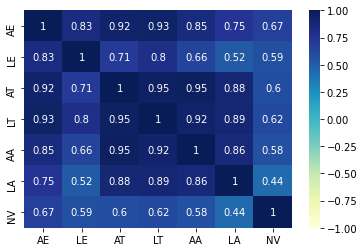

In [10]:
sns.heatmap(data.corr().iloc[2:9,2:9], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

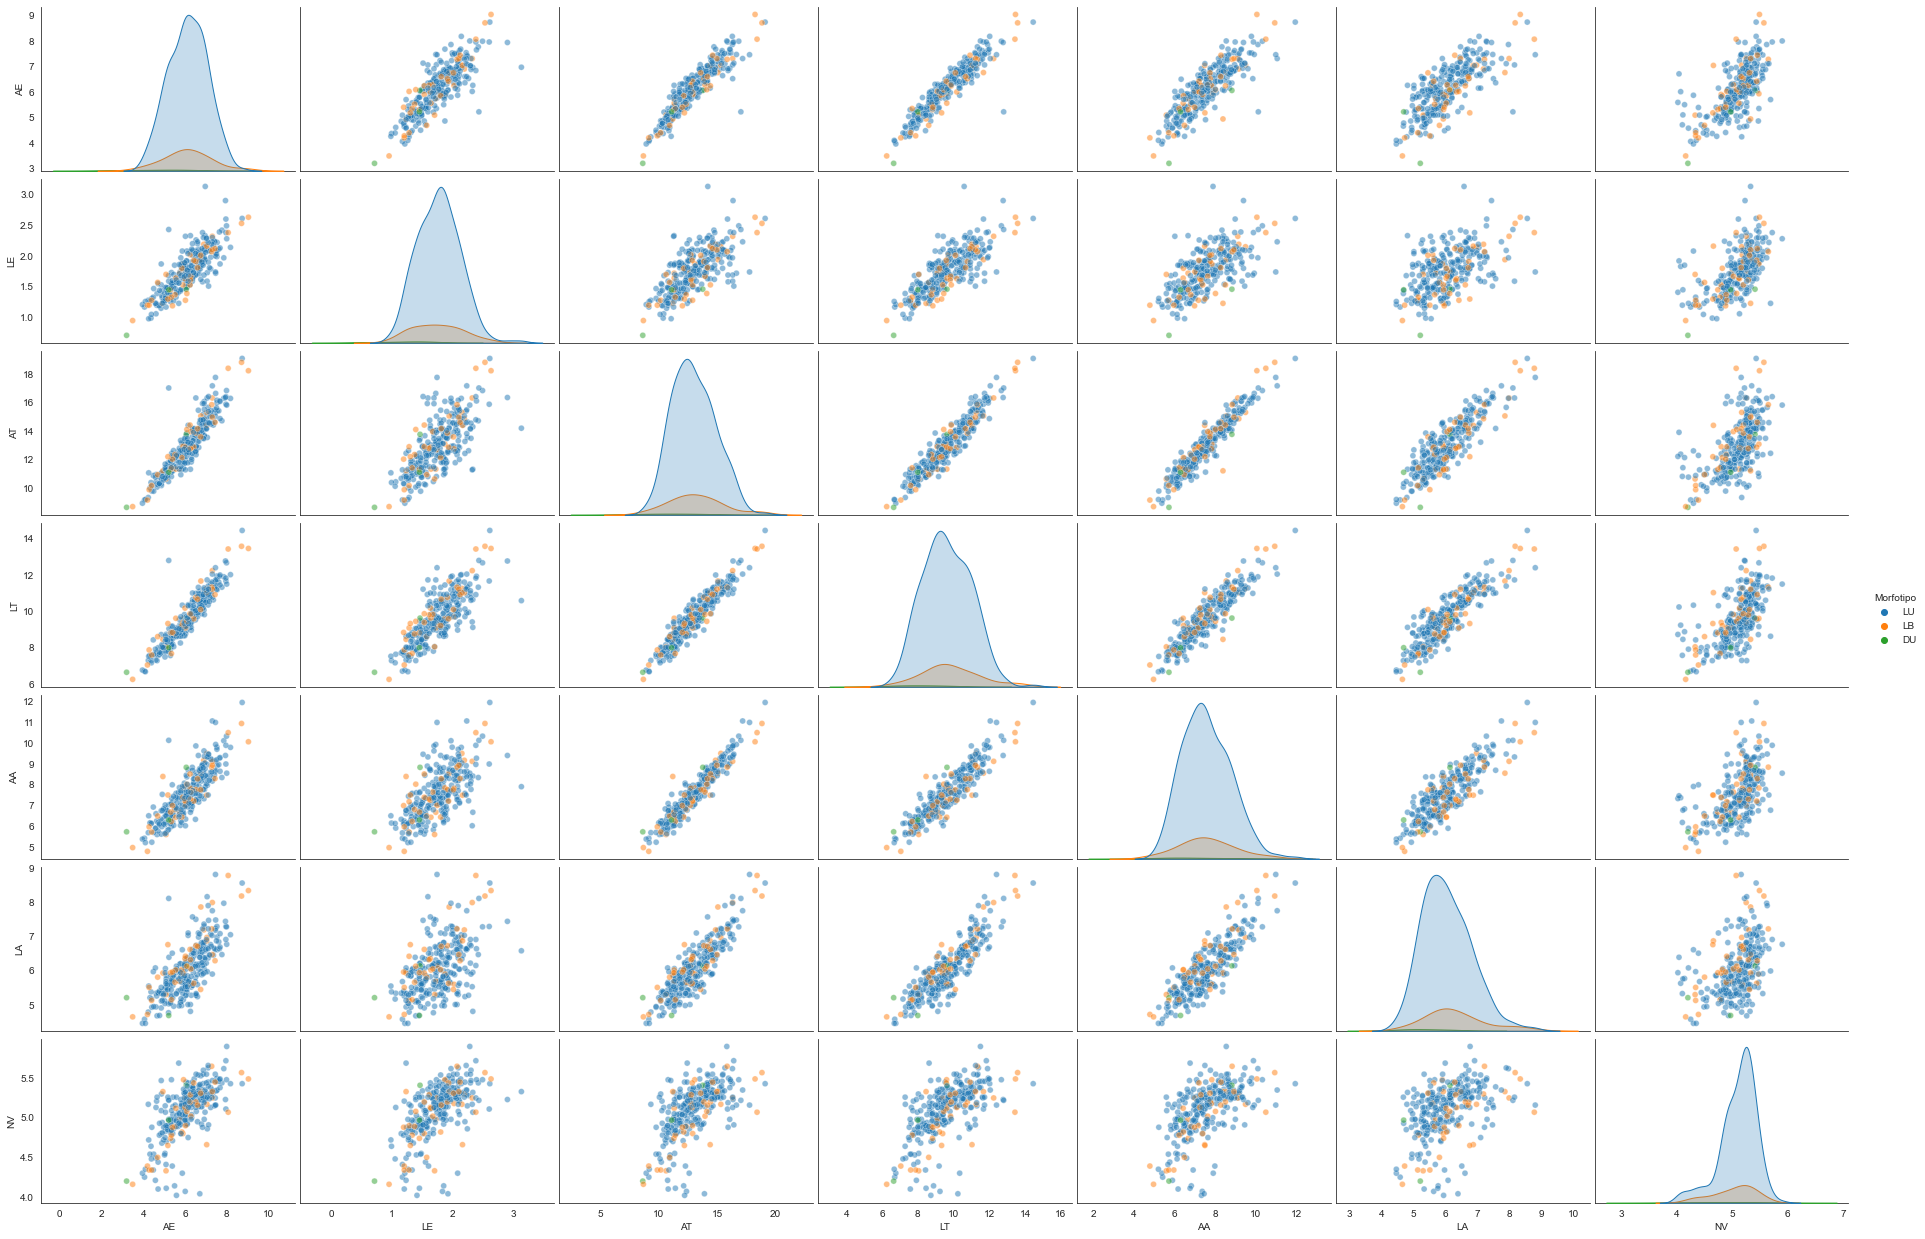

In [19]:
sns.pairplot(data=data,x_vars=['AE','LE','AT','LT','AA','LA','NV'],\
         y_vars=['AE','LE','AT','LT','AA','LA','NV'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

In [12]:
def distribution_plotter(data, label, bins="auto"):    
    plt.figure(figsize = (10,5))
    sns.set_style("white")    
    dist = sns.histplot(data, bins=bins, stat = "count", kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = 500)    
    dist.set_title('Distribucion ', fontsize = 16)
    plt.xticks(rotation=45, ha='right')

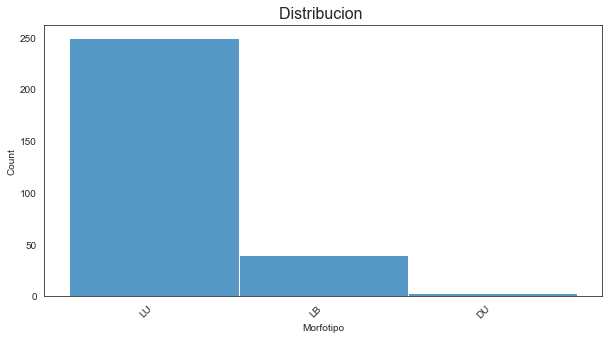

In [13]:
distribution_plotter(data["Morfotipo"],data["Morfotipo"].unique())

array([[<AxesSubplot:title={'center':'AE'}>,
        <AxesSubplot:title={'center':'LE'}>,
        <AxesSubplot:title={'center':'AT'}>],
       [<AxesSubplot:title={'center':'LT'}>,
        <AxesSubplot:title={'center':'AA'}>,
        <AxesSubplot:title={'center':'LA'}>],
       [<AxesSubplot:title={'center':'NV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

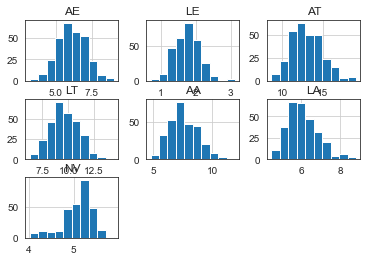

In [14]:
columns = data[["AE","LE","AT","LT","AA","LA","NV"]]
columns.hist()

## Creamos columnas de relación entre variables

In [11]:
data["RatioE"] = data["AE"]/data["LE"]
data["RatioT"] = data["AT"]/data["LT"]
data["RatioA"] = data["AA"]/data["LA"]

In [12]:
data.head()

,Lote,Individuo,AE,LE,AT,LT,AA,LA,NV,Morfotipo,RatioE,RatioT,RatioA
0,99,19,6.92,2.10,13.67,10.43,8.23,6.05,5.22,LU,3.295238,1.310642,1.360331
1,99,20,6.50,1.91,12.51,9.53,6.33,5.80,5.29,LU,3.403141,1.312697,1.091379
2,99,21,6.08,1.74,12.70,9.27,7.59,5.73,5.23,LU,3.494253,1.370011,1.324607
3,99,22,6.50,1.94,12.81,9.80,7.60,5.68,5.26,LU,3.350515,1.307143,1.338028
4,99,23,5.42,1.50,12.17,8.80,7.17,5.57,5.14,LU,3.613333,1.382955,1.287253


### Nueva visualización

<AxesSubplot:>

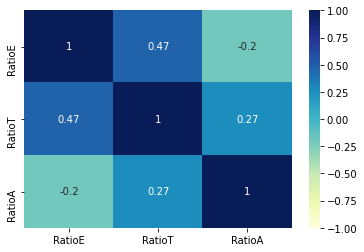

In [14]:
sns.heatmap(data.corr().iloc[9:13,9:13], vmin = -1, vmax = 1, center = 0, cmap = "YlGnBu", annot = True)

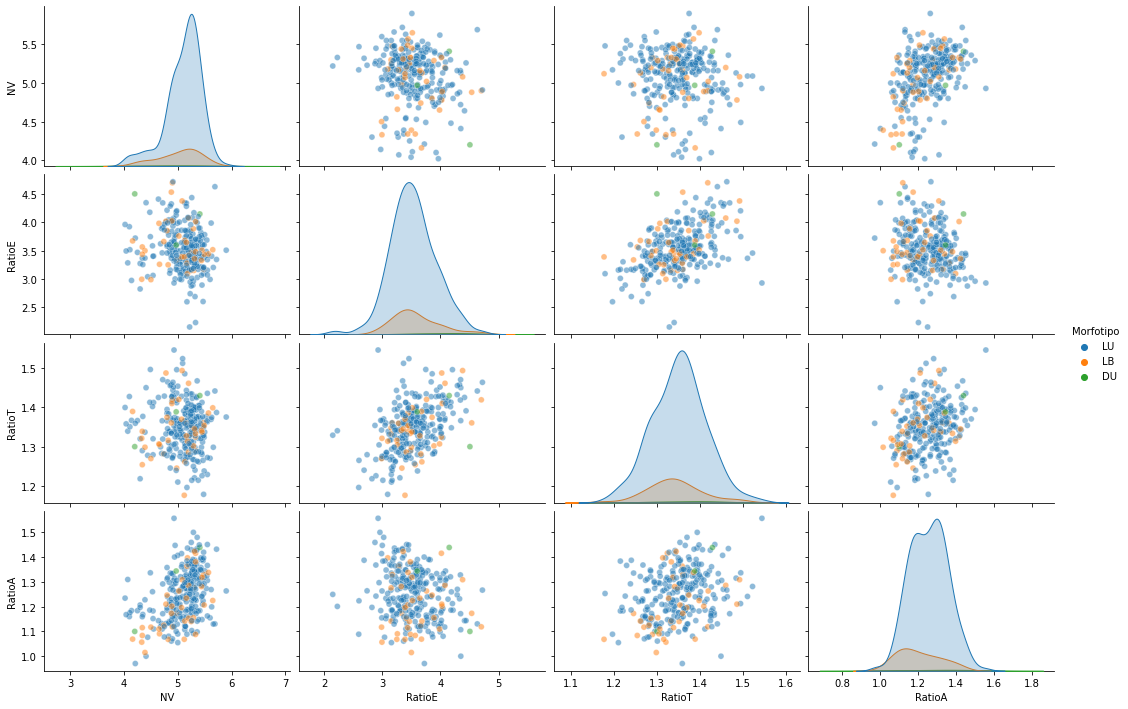

In [15]:
sns.pairplot(data=data,x_vars=['NV','RatioE','RatioT','RatioA'],\
         y_vars=['NV','RatioE','RatioT','RatioA'],hue='Morfotipo',plot_kws={'alpha': 0.5},aspect=1.5);

## Creación Dummies
(creamos dummies de Morfotipo? Es nuestra variable target cuando tenemos el valor)

In [15]:
#data = pd.get_dummies(data=data, columns= ["Morfotipo"], drop_first = True)

In [16]:
#data.head()

In [17]:
#data.shape

## Exportación dataset listo

In [16]:
data.to_csv(r'../conchillas_listo.csv', index = False, header=True)